In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
import os
from preprocess import merge_parquets, sample_dat

In [2]:
merge_data = pd.read_parquet('/Users/alex/Documents/2. NYU/DS-1007 Programming for Data Science/Project/DS1007_FinalProject/data/merge_data.parquet')

In [3]:
merge_data[merge_data['snowfall (cm)']>1]

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,...,total_amount,congestion_surcharge,Airport_fee,date,hour,time,temperature_2m (°C),precipitation (mm),rain (mm),snowfall (cm)
34733184,1,2023-02-28 03:11:16,2023-02-28 03:14:54,1.0,0.50,1.0,N,246,68,1,...,12.95,2.5,0.00,2023-02-28,3,2023-02-28 03:00:00,1.2,1.8,0.1,1.19
34733185,2,2023-02-28 03:30:27,2023-02-28 03:37:15,6.0,1.51,1.0,N,43,230,2,...,13.60,2.5,0.00,2023-02-28,3,2023-02-28 03:00:00,1.2,1.8,0.1,1.19
34733186,2,2023-02-28 03:46:56,2023-02-28 04:16:30,1.0,11.59,1.0,N,132,188,1,...,54.15,0.0,1.25,2023-02-28,3,2023-02-28 03:00:00,1.2,1.8,0.1,1.19
34733187,1,2023-02-28 03:23:49,2023-02-28 03:56:13,1.0,0.00,1.0,N,219,75,1,...,62.55,0.0,0.00,2023-02-28,3,2023-02-28 03:00:00,1.2,1.8,0.1,1.19
34733188,1,2023-02-28 03:52:27,2023-02-28 04:12:36,1.0,10.30,1.0,N,233,134,1,...,56.65,2.5,0.00,2023-02-28,3,2023-02-28 03:00:00,1.2,1.8,0.1,1.19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34904409,2,2023-02-28 08:49:45,2023-02-28 09:11:15,NaN,2.05,NaN,None,246,161,0,...,22.90,NaN,NaN,2023-02-28,8,2023-02-28 08:00:00,0.6,2.0,0.2,1.26
34904410,2,2023-02-28 08:04:02,2023-02-28 08:28:00,NaN,4.29,NaN,None,232,163,0,...,30.06,NaN,NaN,2023-02-28,8,2023-02-28 08:00:00,0.6,2.0,0.2,1.26
34904411,2,2023-02-28 08:46:52,2023-02-28 08:58:55,NaN,1.23,NaN,None,163,100,0,...,21.95,NaN,NaN,2023-02-28,8,2023-02-28 08:00:00,0.6,2.0,0.2,1.26
34904412,2,2023-02-28 08:30:16,2023-02-28 08:52:15,NaN,2.48,NaN,None,225,97,0,...,17.18,NaN,NaN,2023-02-28,8,2023-02-28 08:00:00,0.6,2.0,0.2,1.26


In [4]:
# Step 3 Categorize Weather conditions

# def categorize_weather(row):
#     if row['precipitation (mm)'] > 0 and row['rain (mm)'] < 0 and row['snowfall (cm)'] < 0:
#         return 'Light precipitation'
#     elif row['precipitation (mm)'] > 0 and row['rain (mm)'] > 0 and row['snowfall (cm)'] < 0:
#         return 'Precipitation'
#     elif row['snowfall (cm)'] > 0:
#         return "Snowfall"
#     else:
#         return "Clear day"

In [5]:
conditions = [merge_data['precipitation (mm)'] > 0] # Precipitation

categories = ['Precipitation']

merge_data['weather_cat'] = np.select(conditions, categories, default='Clear day')

# Filter rows where precipitation (mm) > 0 and display relevant columns
print(merge_data.loc[merge_data['precipitation (mm)'] > 0, ['precipitation (mm)', 'rain (mm)', 'snowfall (cm)', 'weather_cat']].head())



"""Vectorization avoids python looping optimizing run time and efficiency, that can improve large
dataset operations considerably
O(N*M)
vs
o(n)


	•	With .apply(axis=1):
	•	You loop through all 1 million rows, calling the function 1 million times.
	•	Time complexity: ~O(N) but with high constant factors due to Python loop overhead.
	•	With Vectorization (numpy.select):
	•	All conditions are evaluated column-wise in a single pass.
	•	Time complexity: ~O(N), but much faster due to C-level optimizations.
"""

        precipitation (mm)  rain (mm)  snowfall (cm)    weather_cat
251380                 1.9        1.9            0.0  Precipitation
251381                 1.9        1.9            0.0  Precipitation
251382                 1.9        1.9            0.0  Precipitation
251383                 1.9        1.9            0.0  Precipitation
251384                 1.9        1.9            0.0  Precipitation


'Vectorization avoids python looping optimizing run time and efficiency, that can improve large\ndataset operations considerably\nO(N*M)\nvs\no(n)\n\n\n\t•\tWith .apply(axis=1):\n\t•\tYou loop through all 1 million rows, calling the function 1 million times.\n\t•\tTime complexity: ~O(N) but with high constant factors due to Python loop overhead.\n\t•\tWith Vectorization (numpy.select):\n\t•\tAll conditions are evaluated column-wise in a single pass.\n\t•\tTime complexity: ~O(N), but much faster due to C-level optimizations.\n'

In [6]:
print(merge_data['weather_cat'].value_counts())

weather_cat
Clear day        32178185
Precipitation     6131935
Name: count, dtype: int64


In [7]:
# Group by weather category and calculate ride frequency and average fare
weather_analysis = merge_data.groupby('weather_cat').agg({
    'tpep_pickup_datetime': 'count',  # Ride frequency
    'fare_amount': ['mean', 'sum'],  # Average and total fares
}).reset_index()

# Rename columns for clarity
weather_analysis.columns = ['weather_cat', 'ride_count', 'avg_fare', 'total_fare']

print(weather_analysis)

     weather_cat  ride_count   avg_fare    total_fare
0      Clear day    32178185  19.508426  6.277458e+08
1  Precipitation     6131935  19.594517  1.201523e+08


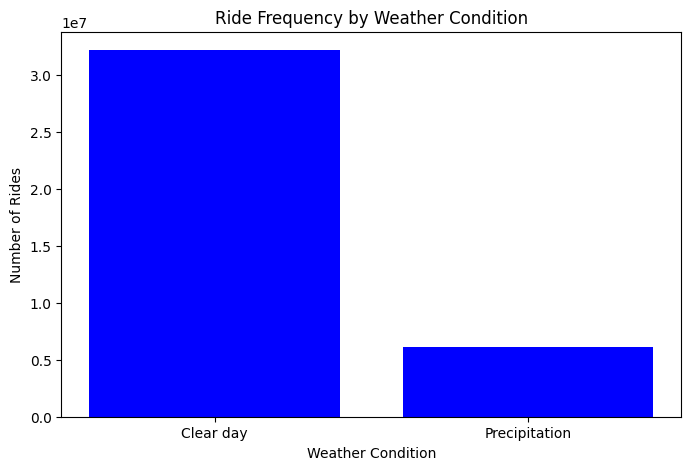

In [8]:
# Plot ride frequency
plt.figure(figsize=(8, 5))
plt.bar(weather_analysis['weather_cat'], weather_analysis['ride_count'], color='blue')
plt.xlabel('Weather Condition')
plt.ylabel('Number of Rides')
plt.title('Ride Frequency by Weather Condition')
plt.show()

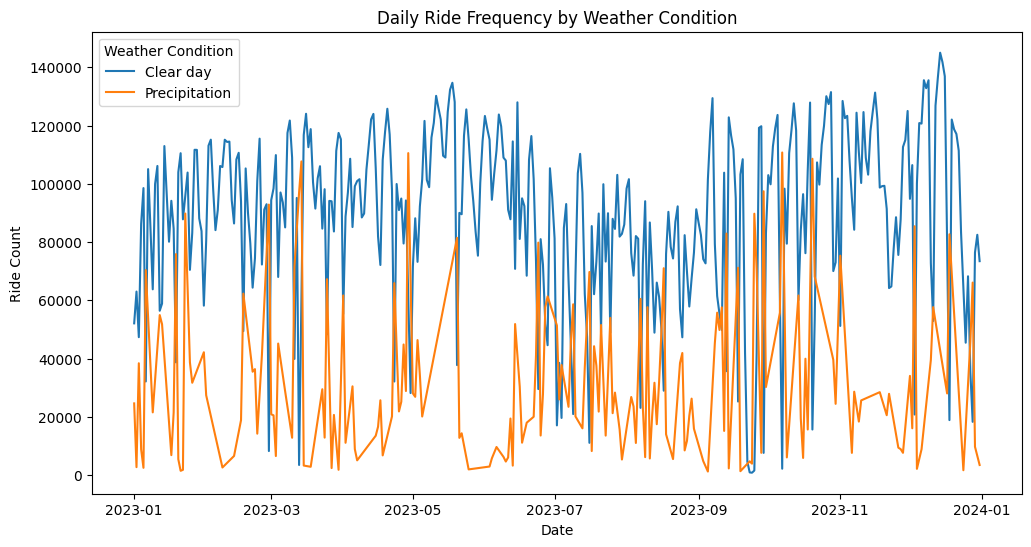

In [9]:
# Group by date and weather
daily_weather_analysis = merge_data.groupby(['date', 'weather_cat']).agg({
    'tpep_pickup_datetime': 'count',
    'fare_amount': 'mean'
}).reset_index()

# Plot trends over time
plt.figure(figsize=(12, 6))
sns.lineplot(data=daily_weather_analysis, x='date', y='tpep_pickup_datetime', hue='weather_cat')
plt.xlabel('Date')
plt.ylabel('Ride Count')
plt.title('Daily Ride Frequency by Weather Condition')
plt.legend(title='Weather Condition')
plt.show()

In [10]:
# Calculate median fare grouped by weather condition
median_fares = merge_data.groupby('weather_cat')['fare_amount'].median().reset_index(name='median_fare')

# Combine with weather_analysis
weather_analysis = weather_analysis.merge(median_fares, on='weather_cat')

print(weather_analysis)

     weather_cat  ride_count   avg_fare    total_fare  median_fare
0      Clear day    32178185  19.508426  6.277458e+08         13.5
1  Precipitation     6131935  19.594517  1.201523e+08         13.5


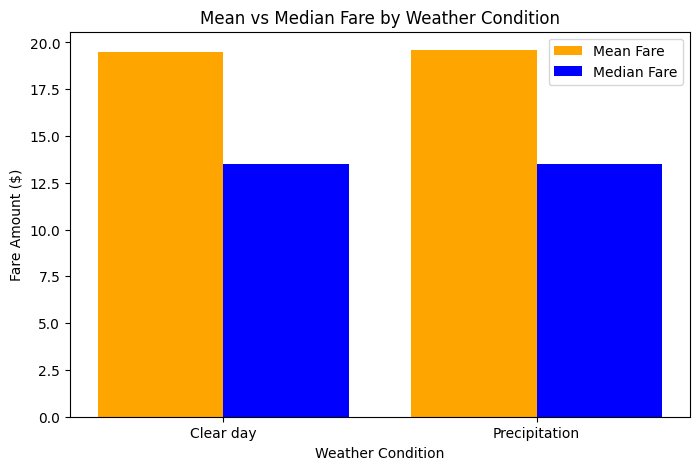

In [11]:
# Plot mean vs median fares
x = weather_analysis['weather_cat']
mean_fare = weather_analysis['avg_fare']
median_fare = weather_analysis['median_fare']

x_axis = range(len(x))

plt.figure(figsize=(8, 5))
plt.bar(x_axis, mean_fare, width=0.4, label='Mean Fare', color='orange')
plt.bar([i + 0.4 for i in x_axis], median_fare, width=0.4, label='Median Fare', color='blue')
plt.xticks([i + 0.2 for i in x_axis], x)
plt.xlabel('Weather Condition')
plt.ylabel('Fare Amount ($)')
plt.title('Mean vs Median Fare by Weather Condition')
plt.legend()
plt.show()

In [12]:
# Normalize by number of weather condition hours
weather_occurrences = merge_data.groupby('weather_cat')['time'].nunique().reset_index(name='weather_hours')

# Merge with weather_analysis
weather_analysis = weather_analysis.merge(weather_occurrences, on='weather_cat')
weather_analysis['rides_per_hour'] = weather_analysis['ride_count'] / weather_analysis['weather_hours']

print(weather_analysis)

     weather_cat  ride_count   avg_fare    total_fare  median_fare  \
0      Clear day    32178185  19.508426  6.277458e+08         13.5   
1  Precipitation     6131935  19.594517  1.201523e+08         13.5   

   weather_hours  rides_per_hour  
0           7405     4345.467252  
1           1354     4528.755539  


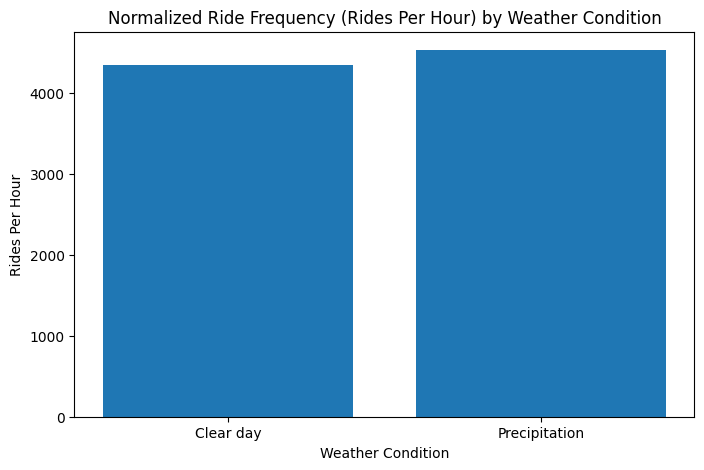

In [13]:
plt.figure(figsize=(8, 5))
plt.bar(weather_analysis['weather_cat'], weather_analysis['rides_per_hour'],)
plt.xlabel('Weather Condition')
plt.ylabel('Rides Per Hour')
plt.title('Normalized Ride Frequency (Rides Per Hour) by Weather Condition')
plt.show()

In [14]:
# Group by date and weather category
daily_weather = merge_data.groupby(['date', 'weather_cat']).agg({
    'tpep_pickup_datetime': 'count',  # Ride count
    'time': 'nunique'  # Number of weather hours in a day
}).reset_index()

# Ensure the date column is in datetime format
daily_weather['date'] = pd.to_datetime(daily_weather['date'])

# Normalize rides per weather hour
daily_weather['rides_per_hour'] = daily_weather['tpep_pickup_datetime'] / daily_weather['time']

print(daily_weather.head())

        date    weather_cat  tpep_pickup_datetime  time  rides_per_hour
0 2023-01-01      Clear day                 52109    17     3065.235294
1 2023-01-01  Precipitation                 24643     7     3520.428571
2 2023-01-02      Clear day                 63014    23     2739.739130
3 2023-01-02  Precipitation                  2763     1     2763.000000
4 2023-01-03      Clear day                 47366    15     3157.733333


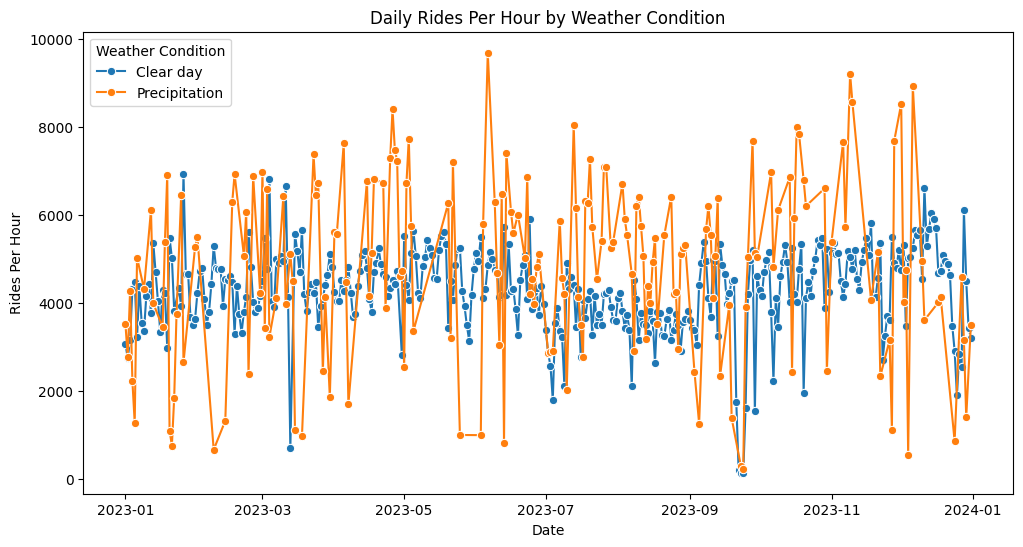

In [15]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=daily_weather, x='date', y='rides_per_hour', hue='weather_cat', marker='o')
plt.xlabel('Date')
plt.ylabel('Rides Per Hour')
plt.title('Daily Rides Per Hour by Weather Condition')
plt.legend(title='Weather Condition')
plt.show()

In [16]:
# Group by date and weather condition
avg_price_per_ride = merge_data.groupby(['date', 'weather_cat']).agg({
    'fare_amount': 'sum',  # Total fare for the day
    'tpep_pickup_datetime': 'count'  # Total rides for the day
}).reset_index()

# Calculate average price per ride
avg_price_per_ride['avg_price_per_ride'] = avg_price_per_ride['fare_amount'] / avg_price_per_ride['tpep_pickup_datetime']

# Rename columns for clarity
avg_price_per_ride.columns = ['date', 'weather_cat', 'total_fare', 'total_rides', 'avg_price_per_ride']

print(avg_price_per_ride.head())

         date    weather_cat  total_fare  total_rides  avg_price_per_ride
0  2023-01-01      Clear day  1203449.88        52109           23.094857
1  2023-01-01  Precipitation   475054.65        24643           19.277468
2  2023-01-02      Clear day  1376602.84        63014           21.845984
3  2023-01-02  Precipitation    67881.18         2763           24.567926
4  2023-01-03      Clear day   946335.76        47366           19.979221


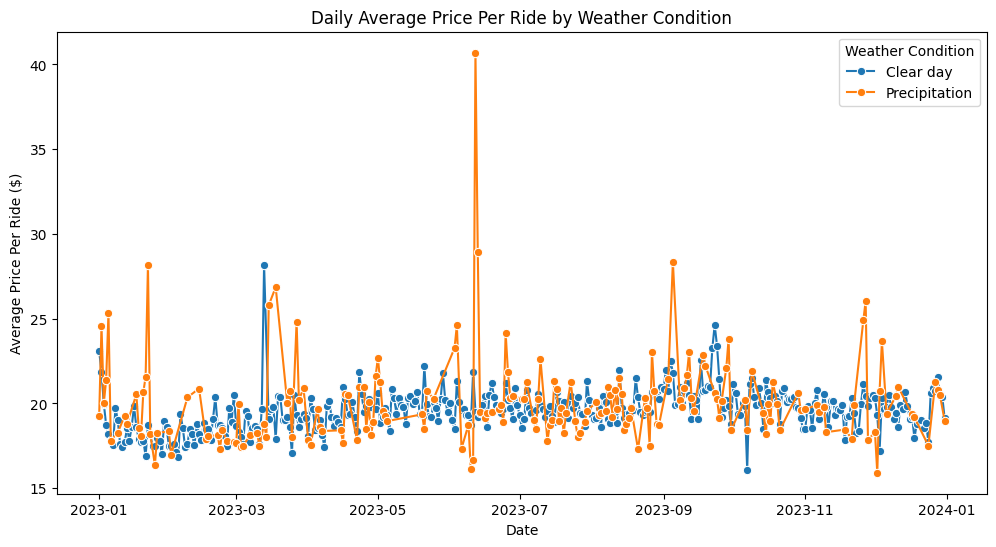

In [17]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=avg_price_per_ride, x='date', y='avg_price_per_ride', hue='weather_cat', marker='o')
plt.xlabel('Date')
plt.ylabel('Average Price Per Ride ($)')
plt.title('Daily Average Price Per Ride by Weather Condition')
plt.legend(title='Weather Condition')
plt.show()

### Temperature

In [18]:
def temperature_categories(temperature):
    conditions = [(temperature < 0),
                  (temperature >= 0) & (temperature < 15),
                  (temperature >= 15)]
    choices = ['Cold (<0)', 'Moderate (0–15)', 'Warm (>=15)']
    return np.select(conditions, choices, default='Unknown')

merge_data['temperature_cat'] = temperature_categories(merge_data['temperature_2m (°C)'])


In [20]:
temp_analysis = merge_data.groupby(['temperature_cat', 'weather_cat', 'hour']).agg({
    'tpep_pickup_datetime': 'count',  # Total rides
    'fare_amount': 'mean'             # Average fare
}).reset_index()

In [28]:
temp_analysis['normalized_rides'] = temp_analysis.groupby(['temperature_cat', 'weather_cat'])['tpep_pickup_datetime'].transform(
    lambda x: x / x.sum()
)

# Check the normalized results
print(temp_analysis.head())

  temperature_cat weather_cat  hour  tpep_pickup_datetime  fare_amount  \
0       Cold (<0)   Clear day     0                 30283    17.791853   
1       Cold (<0)   Clear day     1                 35366    16.277444   
2       Cold (<0)   Clear day     2                 24676    15.714786   
3       Cold (<0)   Clear day     3                 22326    16.907934   
4       Cold (<0)   Clear day     4                 18265    22.279496   

   normalized_rides  
0          0.014146  
1          0.016520  
2          0.011527  
3          0.010429  
4          0.008532  


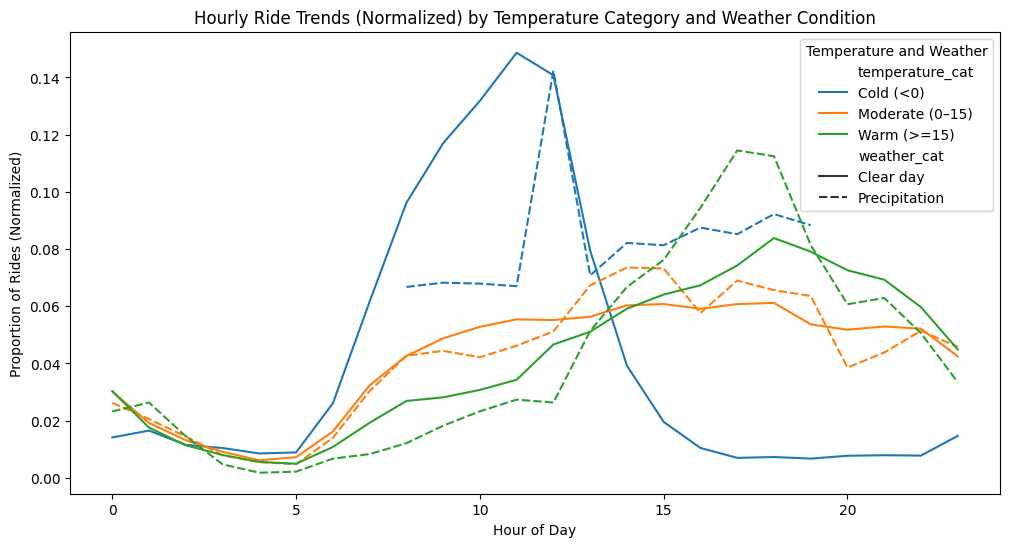

In [29]:
# Plot normalized trends for each temperature and weather category
plt.figure(figsize=(12, 6))
sns.lineplot(data=temp_analysis, x='hour', y='normalized_rides', hue='temperature_cat', style='weather_cat')
plt.xlabel('Hour of Day')
plt.ylabel('Proportion of Rides (Normalized)')
plt.title('Hourly Ride Trends (Normalized) by Temperature Category and Weather Condition')
plt.legend(title='Temperature and Weather')
plt.show()

In [25]:
avg_price_by_temp_time = merge_data.groupby(['date', 'temperature_cat']).agg({
    'fare_amount': 'sum',       # Total fare
    'tpep_pickup_datetime': 'count'  # Total rides
}).reset_index()

# Calculate average price per ride
avg_price_by_temp_time['avg_price_per_ride'] = avg_price_by_temp_time['fare_amount'] / avg_price_by_temp_time['tpep_pickup_datetime']

# Sort by date for easier time-based analysis
avg_price_by_temp_time = avg_price_by_temp_time.sort_values(by=['date', 'temperature_cat'])

# Add rolling average (7-day window) for smoothing
avg_price_by_temp_time['rolling_avg_price'] = avg_price_by_temp_time.groupby('temperature_cat')['avg_price_per_ride'].transform(lambda x: x.rolling(7, min_periods=1).mean())

print(avg_price_by_temp_time.head())

         date  temperature_cat  fare_amount  tpep_pickup_datetime  \
0  2023-01-01  Moderate (0–15)   1678504.53                 76752   
1  2023-01-02  Moderate (0–15)   1444484.02                 65777   
2  2023-01-03  Moderate (0–15)   1715578.34                 85783   
3  2023-01-04  Moderate (0–15)   1197753.35                 61602   
4  2023-01-04      Warm (>=15)    606809.27                 33490   

   avg_price_per_ride  rolling_avg_price  
0           21.869196          21.869196  
1           21.960321          21.914758  
2           19.999048          21.276188  
3           19.443417          20.817995  
4           18.119118          18.119118  


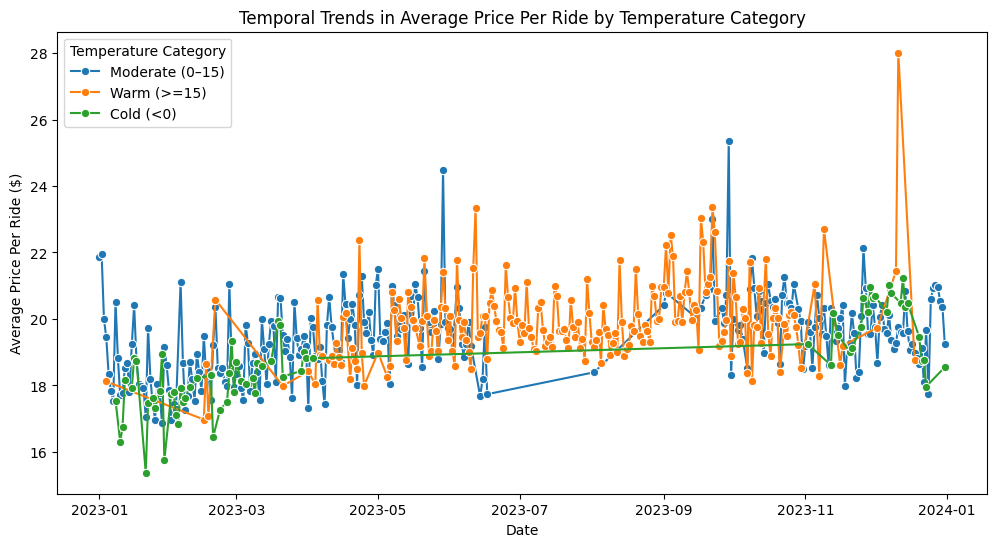

In [26]:
# Plot temporal trends for each temperature category
plt.figure(figsize=(12, 6))
sns.lineplot(data=avg_price_by_temp_time, x='date', y='avg_price_per_ride', hue='temperature_cat', marker='o')
plt.xlabel('Date')
plt.ylabel('Average Price Per Ride ($)')
plt.title('Temporal Trends in Average Price Per Ride by Temperature Category')
plt.legend(title='Temperature Category')
plt.show()

In [34]:
# Group by date, weather condition, and temperature category
daily_weather_temp = merge_data.groupby(['date', 'weather_cat', 'temperature_cat']).agg({
    'tpep_pickup_datetime': 'count',  # Total ride count
    'time': 'nunique'  # Number of weather hours in a day
}).reset_index()

# Ensure the date column is in datetime format
daily_weather_temp['date'] = pd.to_datetime(daily_weather_temp['date'])

# Calculate rides per hour
daily_weather_temp['rides_per_hour'] = daily_weather_temp['tpep_pickup_datetime'] / daily_weather_temp['time']

# Check the resulting data
print(daily_weather_temp.head())

        date    weather_cat  temperature_cat  tpep_pickup_datetime  time  \
0 2023-01-01      Clear day  Moderate (0–15)                 52109    17   
1 2023-01-01  Precipitation  Moderate (0–15)                 24643     7   
2 2023-01-02      Clear day  Moderate (0–15)                 63014    23   
3 2023-01-02  Precipitation  Moderate (0–15)                  2763     1   
4 2023-01-03      Clear day  Moderate (0–15)                 47366    15   

   rides_per_hour  
0     3065.235294  
1     3520.428571  
2     2739.739130  
3     2763.000000  
4     3157.733333  


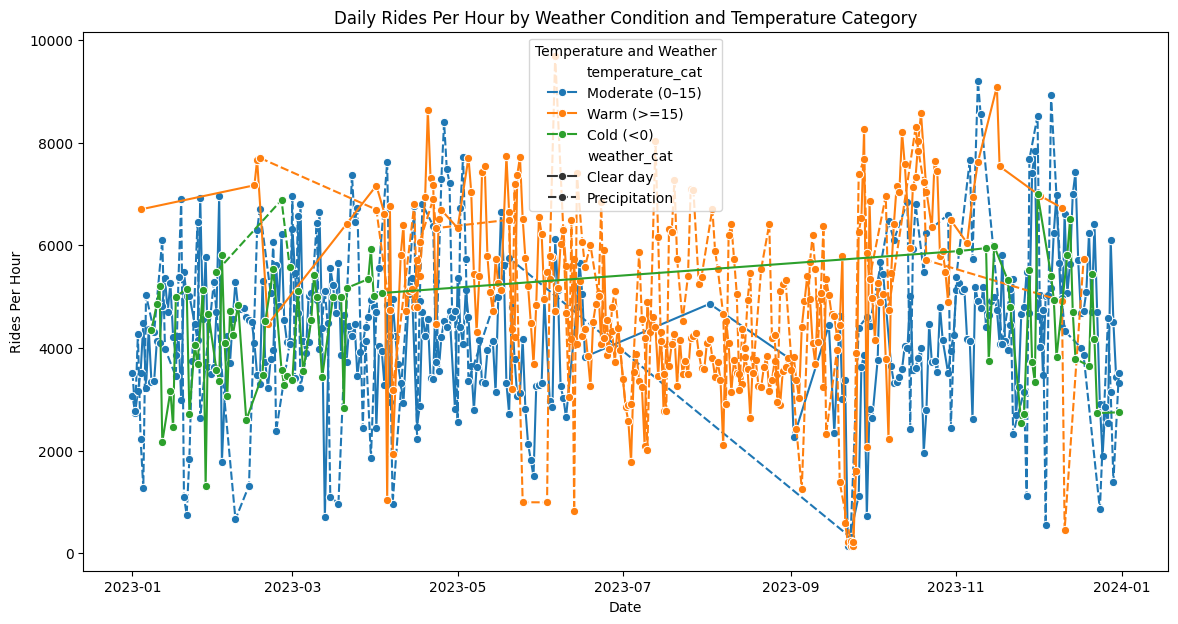

In [35]:
plt.figure(figsize=(14, 7))
sns.lineplot(
    data=daily_weather_temp,
    x='date',
    y='rides_per_hour',
    hue='temperature_cat',
    style='weather_cat',
    marker='o'
)
plt.xlabel('Date')
plt.ylabel('Rides Per Hour')
plt.title('Daily Rides Per Hour by Weather Condition and Temperature Category')
plt.legend(title='Temperature and Weather')
plt.show()

#### Brainstorming

1. Temperature variable comes into play here. How?
- Create a second graph that compares temprature maybe in terms of bins like -10, -10 to -5, -5, 10, 10+ ans see if there is a change
- How does the price rates changes hourly in terms of precipitation and no precipitation


2. Shrinking the data into quarters and comparing through a t test if there is a difference
3. 